In [325]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [326]:
aigen5_zeroshot = pd.read_csv('summary_aigen5_zeroshot.csv')
df_aigen5_zeroshot = aigen5_zeroshot[['APIs', 'F1 Score']]
df_aigen5_zeroshot

,APIs,F1 Score
0,CONVERT_TEXT_TO_SPEECH,0.98
1,CREATE_CALENDAR_EVENT,0.62
2,CREATE_REMINDER,0.99
3,GENERATE_IMAGE,0.94
4,GET_CALENDAR_EVENTS,0.81
5,GET_CURRENT_DATE_AND_TIME,1.00
6,GET_CURRENT_STOCK_PRICE,0.99
7,GET_NEWS,0.84
8,GET_WEATHER,0.98
9,NOT_AVAILABLE,0.93


In [327]:
aigen13_zeroshot = pd.read_csv('summary_aigen13_zeroshot.csv')
df_aigen13_zeroshot = aigen13_zeroshot[['APIs', 'F1 Score']]
df_aigen13_zeroshot

,APIs,F1 Score
0,CONVERT_TEXT_TO_SPEECH,1.00
1,CREATE_CALENDAR_EVENT,0.57
2,CREATE_REMINDER,1.00
3,GENERATE_IMAGE,0.98
4,GET_CALENDAR_EVENTS,0.88
5,GET_CURRENT_DATE_AND_TIME,1.00
6,GET_CURRENT_STOCK_PRICE,1.00
7,GET_NEWS,0.89
8,GET_WEATHER,1.00
9,NOT_AVAILABLE,0.77


In [328]:
sparksofagi_zeroshot = pd.read_csv('summary_sparksofagi_zeroshot.csv')
df_sparksofagi_zeroshot = sparksofagi_zeroshot[['APIs', 'F1 Score']]
df_sparksofagi_zeroshot

,APIs,F1 Score
0,CONVERT_TEXT_TO_SPEECH,0.95
1,CREATE_CALENDAR_EVENT,0.78
2,CREATE_REMINDER,0.94
3,GENERATE_IMAGE,1.00
4,GET_CALENDAR_EVENTS,0.79
5,GET_CURRENT_DATE_AND_TIME,1.00
6,GET_CURRENT_STOCK_PRICE,1.00
7,GET_NEWS,1.00
8,GET_WEATHER,0.97
9,NOT_AVAILABLE,0.72


In [329]:
# Read CSV files and extract relevant columns and set 'user_prompt' as index
def read_and_process(filename, model_name):
    df = pd.read_csv(filename)[['APIs', 'F1 Score']]
    df.set_index('APIs', inplace=True)
    df.columns = [model_name]
    return df

In [330]:
# GPT-4 dt
GPT4_aigen13_zeroshot_df = read_and_process('summary_aigen13_zeroshot.csv', 'GPT4_AIg13_zshot')
GPT4_sparksofagi_zeroshot_df = read_and_process('summary_sparksofagi_zeroshot.csv', 'GPT4_Spark_zshot')
GPT4_aigen5_zeroshot_df = read_and_process('summary_aigen5_zeroshot.csv', 'GPT4_AIg_5_zshot')

# GPT-4 dt Concatenate the DataFrames along the columns axis
dfs_combined = pd.concat([GPT4_aigen13_zeroshot_df, GPT4_sparksofagi_zeroshot_df, GPT4_aigen5_zeroshot_df], axis=1)

# GPT-4 dt Compute the average across columns for each row
GPT4_average_df = dfs_combined.mean(axis=1).to_frame(name="GPT4 avg. F1 Score").round(2)


# Palm dt
Palm_aigen13_zeroshot_df = read_and_process('summary_palm_using_aigen13_zeroshot.csv', 'Palm_AIg13_zshot')
Palm_sparksofagi_zeroshot_df = read_and_process('summary_palm_using_sparksofagi.csv', 'Palm_Spark_zshot')
Palm_aigen5_zeroshot_df = read_and_process('summary_palm_using_aigen5_zeroshot.csv', 'Palm_AIg_5_zshot')

# Palm dt Concatenate the DataFrames along the columns axis
dfs_combined = pd.concat([Palm_aigen13_zeroshot_df, Palm_sparksofagi_zeroshot_df, Palm_aigen5_zeroshot_df], axis=1)

# Palm dt Compute the average across columns for each row
Palm_average_df = dfs_combined.mean(axis=1).to_frame(name="Palm avg. F1 Score").round(2)

# Llama2 dt 
Llama2_aigen13_zeroshot_df = read_and_process('summary_llama2_using_aigen13_zeroshot.csv', 'Llama2_AIg13_zeroshot')
Llama2_sparksofagi_zeroshot_df = read_and_process('summary_llama2_using_sparksofagi.csv', 'Llama2_Spark_zshot')
Llama2_aigen5_zeroshot_df = read_and_process('summary_llama2_using_aigen13_zeroshot.csv', 'Llama2_AIg_5_zshot') 

# Palm dt Concatenate the DataFrames along the columns axis
dfs_combined = pd.concat([Llama2_aigen13_zeroshot_df, Llama2_sparksofagi_zeroshot_df, Llama2_aigen5_zeroshot_df], axis=1)

# Palm dt Compute the average across columns for each row
Llama2_average_df = dfs_combined.mean(axis=1).to_frame(name="Llama2 avg. F1 Score").round(2)



In [331]:
# Concatenate DataFrames side by side
df = pd.concat([GPT4_aigen13_zeroshot_df, GPT4_sparksofagi_zeroshot_df, GPT4_aigen5_zeroshot_df, Palm_aigen5_zeroshot_df, Palm_aigen13_zeroshot_df, Palm_sparksofagi_zeroshot_df, Llama2_aigen13_zeroshot_df, Llama2_sparksofagi_zeroshot_df, Llama2_aigen5_zeroshot_df, GPT4_average_df, Palm_average_df, Llama2_average_df], axis=1)#, aigen2_oneshot_df, autogpt_zeroshot_df, aigen5_oneshot_df], axis=1)
final_df_transposed = df

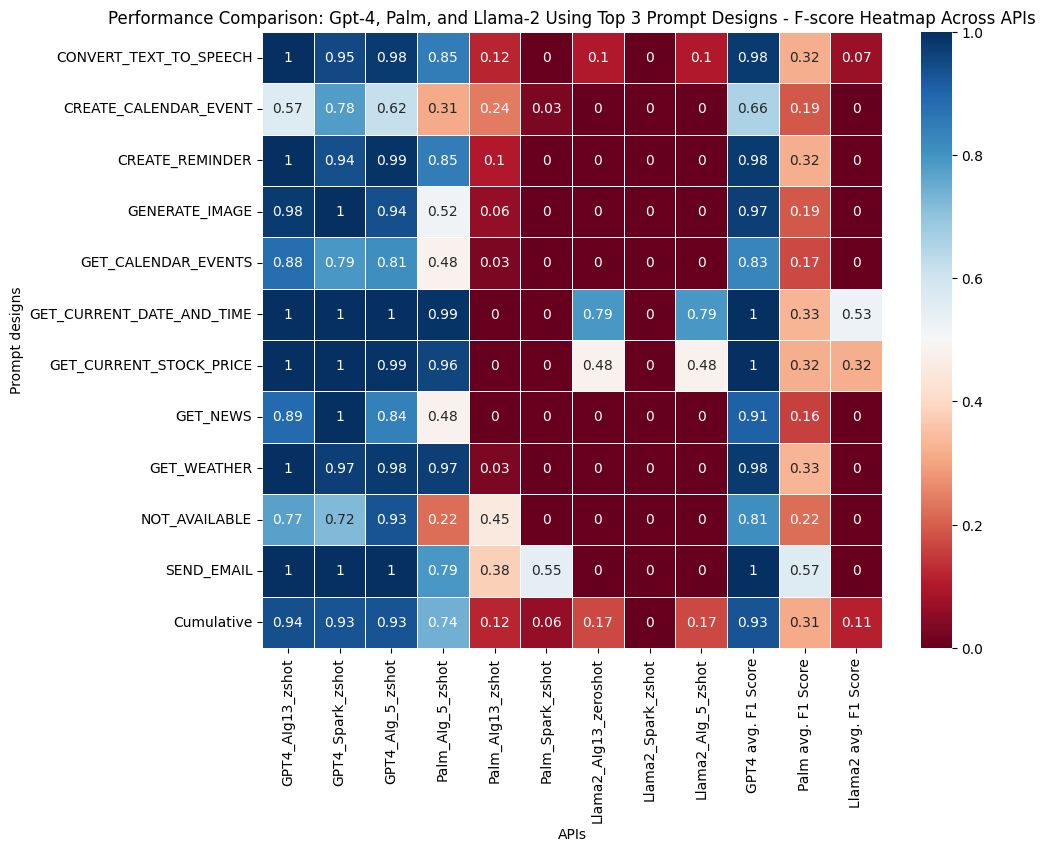

In [332]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(final_df_transposed, annot=True, cmap="RdBu", linewidths=0.5)
ax.set_ylabel('Prompt designs')
ax.set_xlabel('APIs')
plt.title('Performance Comparison: Gpt-4, Palm, and Llama-2 Using Top 3 Prompt Designs - F-score Heatmap Across APIs')
plt.show()

In [333]:
import pandas as pd

# Dummy data for example
data = {
    'Model': ['GPT-4']*3 + ['Palm']*3 + ['Llama2']*3,
    'Prompt Design': ['aigen13', 'sparksofagi', 'aigen5']*3,
    'F-Score': [0.8, 0.7, 0.9, 0.75, 0.65, 0.8, 0.7, 0.6, 0.8] # Sample F-scores
}

# Creating the DataFrame
df = pd.DataFrame(data)


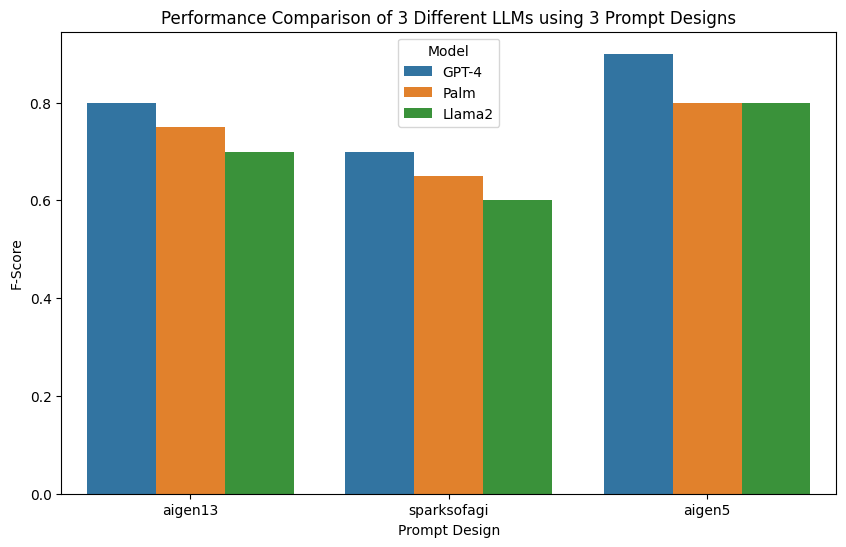

In [334]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(x='Prompt Design', y='F-Score', hue='Model', data=df)
plt.title('Performance Comparison of 3 Different LLMs using 3 Prompt Designs')
plt.ylabel('F-Score')
plt.xlabel('Prompt Design')
plt.show()
